In [1]:
import pandas as pd
import numpy as np
import requests
import re
import json
import os
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels as sm
import warnings
warnings.filterwarnings('ignore')


### Gathering Data :

- from csv Files (Manually)
- Fromy tsv file progrematecaly
- From jason file

In [2]:
archive_dog_twitter_df=pd.read_csv('twitter-archive-enhanced.csv')
archive_dog_twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
#file_name
response = requests.get(url)

if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)


In [4]:
predict_df = pd.read_csv(file_name , sep = '\t')
predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### just copy and paste twetter API CODE

In [5]:
"""
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""


'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.

## - IMPORTIND DATA FROM DOWNLOADED "tweet_json"FILE

In [6]:
twetter_df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        
        tweet_id = tweet['id']
        user_followers_count = tweet['user']['followers_count']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        twetter_df_list.append({'tweet_id':tweet_id,
                                'user_followers': user_followers_count,
                               'retweet_count': retweet_count,
                               'favorite_count': favorite_count})

        

api_df = pd.DataFrame(twetter_df_list)
api_df = api_df.reindex(columns=['tweet_id','user_followers','retweet_count','favorite_count'])

api_df.head(10) 


,tweet_id,user_followers,retweet_count,favorite_count
0,892420643555336193,3200889,8853,39467
1,892177421306343426,3200889,6514,33819
2,891815181378084864,3200889,4328,25461
3,891689557279858688,3200889,8964,42908
4,891327558926688256,3200889,9774,41048
5,891087950875897856,3200889,3261,20562
6,890971913173991426,3200889,2158,12041
7,890729181411237888,3200889,16716,56848
8,890609185150312448,3200889,4429,28226
9,890240255349198849,3200889,7711,32467


In [7]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
user_followers    2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


### Assesing Data


In [8]:
archive_dog_twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
archive_dog_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
archive_dog_twitter_df.loc[[1193]]['text']#.str.len()

1193    People please. This is a Deadly Mediterranean ...
Name: text, dtype: object

In [11]:
archive_dog_twitter_df['name'].sample(10)


2056        None
223        Noosh
400      Scooter
1990    Leonidas
2221        DayZ
1118       Larry
404         None
1477        None
1830     Kenneth
103         None
Name: name, dtype: object

In [12]:
archive_rating = archive_dog_twitter_df['rating_numerator']
archive_rating.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [13]:
archive_rating.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
archive_dog_twitter_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
test_text = archive_dog_twitter_df[archive_dog_twitter_df['rating_numerator'] == 1776]['text']
test_text

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object

In [16]:
predict_df


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
predict_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [19]:
predict_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
api_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
user_followers    2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [22]:
archive_dog_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob


### Quality
##### `twitter-archive-enhanced` table
- source column has been reported html structure need to be cleaned to represent tweet platform source only


- remove tweets that dosen't have related retweet count or favorit count


- Error data type for (timestamp ,etc.. )
    
   - tweet_id [to str].
   - in_reply_to_status_id [to str].
   - in_reply_to_user_id [to str].

   - timestamp[to time].

   - retweeted_status_id [to str].
   - retweeted_status_user_id [to str].
   - retweeted_status_timestamp[to time].
    
    
- name column contain none value which is counted as a name so info method report that there are no Null values whoever we have 745 name = "none".


- none values should be empty.  


- rating_denominator max value has non relevant values



- rating_numerator max value (1776) is wiered and may be extracted in wrong way


- rating_numerator has value (13.5) is extracted in wrong way to be 5 instead.




- name column contain names with 1st litter upper case and lower case, need to be unified.


- name column contain wrong names i.e.(one letter name , non relevant names like 'actually' which is not a name in row 1693)


- colimns (doggo,floofer,pupper,puppo) have several NaN values,
ther are 1976 tweets with out any dog discrebtions.




- expanded_urls column has 59 NaN values.

- extended url have missing values.


##### `image-predictions.tsv` table
- fix data type for tweet id
- Columns names are not expressive ie. (p1 should be 1st_prediction or prediction_1).
- reply and retweet should be removed.


##### `General` 


- Tables do not have the same number of rows.



### Tidness

##### `twitter-archive-enhanced` table
- The dog breed columns should be squized to on column dog_breed.

- columns [ "in_reply_to_status_id" , "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" ] should be droped after removig replys and retweets.



##### `image-predictions.tsv` table

- some columns headers are values ie.(p1,p2).

##### `General` 
- twitter-archive table should be merged with api_df which have the retweet count to be in one tidy data frame.


# - clening

In [23]:
archive_dog_twitter_df_clean = archive_dog_twitter_df.copy()
predict_df_clean = predict_df.copy()
api_df_clean =api_df.copy()

In [24]:
archive_dog_twitter_df_clean.shape

(2356, 17)

In [25]:
predict_df_clean.shape

(2075, 12)

In [26]:
api_df_clean.shape

(2354, 4)

#### `twitter-archive-enhanced table`: change source column html format

##### Define
Use split method to get the last part between ('<' & '>') which contain the tweet source only

##### Code

In [27]:
archive_dog_twitter_df_clean.source = archive_dog_twitter_df_clean.source.str.split(r"\<|\>", expand=True)[2]

##### Test

In [28]:
archive_dog_twitter_df_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### `twitter-archive-enhanced table`: Fix data type format

##### Define
- Use astype method to fix tweets id type errors.
- use To datetime to fix •	timestamp type errors.

##### Code

In [29]:
archive_dog_twitter_df_clean.tweet_id = archive_dog_twitter_df_clean.tweet_id.astype(str)

archive_dog_twitter_df_clean.in_reply_to_status_id = archive_dog_twitter_df_clean.in_reply_to_status_id.astype(str).replace("nan",np.nan)


archive_dog_twitter_df_clean.in_reply_to_user_id = archive_dog_twitter_df_clean.in_reply_to_user_id.astype(str).replace("nan",np.nan)

archive_dog_twitter_df_clean.retweeted_status_id = archive_dog_twitter_df_clean.retweeted_status_id.astype(str).replace("nan",np.nan)
archive_dog_twitter_df_clean.retweeted_status_user_id = archive_dog_twitter_df_clean.retweeted_status_user_id.astype(str).replace("nan",np.nan)

archive_dog_twitter_df_clean.rating_denominator = archive_dog_twitter_df_clean.rating_denominator.astype(float)
archive_dog_twitter_df_clean.rating_numerator = archive_dog_twitter_df_clean.rating_numerator.astype(float)




In [30]:
archive_dog_twitter_df_clean.timestamp = pd.to_datetime(archive_dog_twitter_df_clean.timestamp)
archive_dog_twitter_df_clean.retweeted_status_timestamp = pd.to_datetime(archive_dog_twitter_df_clean.retweeted_status_timestamp)

##### Test

In [31]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetim

In [32]:
archive_dog_twitter_df_clean.sample(5)
#archive_dog_twitter_df_clean[pd.isnull(archive_dog_twitter_df_clean['expanded_urls'])]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
954,751793661361422336,NaN,NaN,2016-07-09 15:02:31,Vine - Make a Scene,This is Fred. He's having one heck of a summer...,NaN,NaN,NaT,https://vine.co/v/5W5YHdTJvaV,11.0,10.0,Fred,None,None,None,None
2316,666649482315059201,NaN,NaN,2015-11-17 16:09:56,Twitter for iPhone,Cool dog. Enjoys couch. Low monotone bark. Ver...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666649482...,4.0,10.0,None,None,None,None,None
802,772193107915964416,NaN,NaN,2016-09-03 22:02:38,Twitter for iPhone,This is Willem. He's a Penn State pupper. Thin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/772193107...,12.0,10.0,Willem,None,None,pupper,None
1719,680161097740095489,NaN,NaN,2015-12-24 23:00:17,Twitter for iPhone,Meet Goliath. He's an example of irony. Head i...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/680161097...,12.0,10.0,Goliath,None,None,None,None
2309,666804364988780544,NaN,NaN,2015-11-18 02:25:23,Twitter for iPhone,This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666804364...,8.0,10.0,Jockson,None,None,None,None


#### `predict table`: Fix data type format

##### Define
- Use astype method to fix tweets id type errors.

##### Code

In [33]:
predict_df_clean.tweet_id = predict_df_clean.tweet_id.astype(str)

##### Test

In [34]:
predict_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### `api_df`: Fix data type format

##### Define
- Use astype method to fix tweets id type errors.

##### Code

In [35]:
api_df_clean .tweet_id = api_df_clean .tweet_id.astype(str)

##### Test

In [36]:
api_df_clean .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
user_followers    2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


#### `twitter-archive-enhanced table`:

##### Define
remove tweets with no image by comparing the two id columns in the two data frames.

##### Code

In [37]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length

tweet_with_image = list(predict_df_clean.tweet_id.unique())

len(list(predict_df_clean.tweet_id.unique()))

archive_dog_twitter_df_clean.tweet_id.isin(tweet_with_image).sum()
len(tweet_with_image) == archive_dog_twitter_df_clean.tweet_id.isin(tweet_with_image).sum()

True

In [38]:
archive_dog_twitter_df_clean.tweet_id.isin(tweet_with_image).sum()
#remove any tweet without image
archive_dog_twitter_df_clean = archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.tweet_id.isin(tweet_with_image)]

In [39]:
len(tweet_with_image)

2075

In [40]:
api_df_clean.tweet_id.isin(tweet_with_image).sum()

2073

In [41]:
len(tweet_with_image) == api_df_clean.tweet_id.isin(tweet_with_image).sum()



False

In [42]:
api_df_clean = api_df_clean[api_df_clean.tweet_id.isin(tweet_with_image)]


##### Test

In [43]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2073 non-null object
user_followers    2073 non-null int64
retweet_count     2073 non-null int64
favorite_count    2073 non-null int64
dtypes: int64(3), object(1)
memory usage: 81.0+ KB


In [44]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2075 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null object
retweeted_status_user_id      81 non-null object
retweeted_status_timestamp    81 non-null datetime64[ns]
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null float64
rating_denominator            2075 non-null float64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
dtypes: datetime64

In [45]:
archive_dog_twitter_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


#### `twitter-archive-enhanced table`: fix archive data frame by removing the additional tweets

### Define 

remove tweets that dosen't have related retweet count or favorit count by comparing the two data frames of archive and api

In [46]:
# creating a list of tweet_ids on api df 
tweet_on_api = list(api_df_clean.tweet_id.unique())
#check two lists length
len(tweet_on_api) == archive_dog_twitter_df_clean.tweet_id.isin(tweet_on_api).sum()


True

In [47]:
#remove any tweet not in api df
archive_dog_twitter_df_clean = archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.tweet_id.isin(tweet_on_api)]

In [48]:
predict_df_clean = predict_df_clean[predict_df_clean.tweet_id.isin(tweet_on_api)]

### Test

In [49]:
tweet_on_api = list(api_df_clean.tweet_id.unique())


In [50]:
tweet_on_archive = list(archive_dog_twitter_df_clean.tweet_id.unique())
tweet_on_predict = list(predict_df_clean.tweet_id.unique())

In [51]:
test_list = (tweet_on_api == tweet_on_archive)
test_list

True

In [52]:
archive_dog_twitter_df_clean.shape

(2073, 17)

In [53]:
api_df_clean.shape

(2073, 4)

In [54]:
predict_df_clean.shape

(2073, 12)

In [55]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null object
retweeted_status_user_id      79 non-null object
retweeted_status_timestamp    79 non-null datetime64[ns]
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null float64
rating_denominator            2073 non-null float64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
dtypes: datetime64

#### `twitter-archive-enhanced table`: remove retweets & reply
#### `predict table`: remove retweets & reply

##### Define
Use retweet id and reply id to filter the tweets from retweets and replys.

##### Code

In [56]:
#Extract the tweets that include data in the in_reply_to_status_id.
reply_list = archive_dog_twitter_df_clean.in_reply_to_status_id.notnull()
#Dropping the reply tweets
archive_dog_twitter_df_clean = archive_dog_twitter_df_clean[~reply_list]

#Extract the tweets that include data in the retweet_status_id.
retweet_list = archive_dog_twitter_df_clean.retweeted_status_id.notnull()
#Dropping the retweets
archive_dog_twitter_df_clean = archive_dog_twitter_df_clean[~retweet_list]

#retweet_list.head(32)

In [57]:

#predict_df_clean = predict_df_clean[~np.logical_not(predict_df_clean .tweet_id.isin(list(archive_dog_twitter_df_clean .tweet_id)))]
predict_df_clean = predict_df_clean[(predict_df_clean.tweet_id.isin(list(archive_dog_twitter_df_clean.tweet_id)))]
api_df_clean = api_df_clean[(api_df_clean.tweet_id.isin(list(archive_dog_twitter_df_clean.tweet_id)))]


##### Test

In [58]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null float64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
dtypes: datetime64[ns](

In [59]:
predict_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1971 non-null object
jpg_url     1971 non-null object
img_num     1971 non-null int64
p1          1971 non-null object
p1_conf     1971 non-null float64
p1_dog      1971 non-null bool
p2          1971 non-null object
p2_conf     1971 non-null float64
p2_dog      1971 non-null bool
p3          1971 non-null object
p3_conf     1971 non-null float64
p3_dog      1971 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


In [60]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          1971 non-null object
user_followers    1971 non-null int64
retweet_count     1971 non-null int64
favorite_count    1971 non-null int64
dtypes: int64(3), object(1)
memory usage: 77.0+ KB


#### `twitter-archive-enhanced table`:

##### Define
Use replace method to convert none values to empty NaN. 

##### Code

In [61]:
archive_dog_twitter_df_clean.iloc[:, -5:  ] = archive_dog_twitter_df_clean.iloc[:, -5:  ].replace('None',np.nan)


##### Test

In [62]:
archive_dog_twitter_df_clean[pd.isnull(archive_dog_twitter_df_clean['name'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,NaN,NaN,NaN
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,NaN,NaN,NaN,NaN,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03,Twitter for iPhone,You may not have known you needed to see this ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/887343217...,13.0,10.0,NaN,NaN,NaN,NaN,NaN
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08,Twitter for iPhone,This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/887101392...,12.0,10.0,NaN,NaN,NaN,NaN,NaN
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00,Twitter for iPhone,Here we have a corgi undercover as a malamute....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/885167619...,13.0,10.0,NaN,NaN,NaN,NaN,NaN
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/884441805...,14.0,10.0,NaN,NaN,NaN,NaN,NaN
47,883117836046086144,NaN,NaN,2017-07-07 00:17:54,Twitter for iPhone,Please only send dogs. We don't rate mechanics...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/883117836...,13.0,10.0,NaN,NaN,NaN,NaN,NaN
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32,Twitter for iPhone,Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/880872448...,12.0,10.0,NaN,NaN,NaN,NaN,NaN
62,880095782870896641,NaN,NaN,2017-06-28 16:09:20,Twitter for iPhone,Please don't send in photos without dogs in th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/880095782...,11.0,10.0,NaN,NaN,NaN,NaN,NaN


In [63]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null float64
name                          1447 non-null object
doggo                         73 non-null object
floofer                       8 non-null object
pupper                        209 non-null object
puppo                         23 non-null object
dtypes: datetime64[ns](2), floa

#### `twitter-archive-enhanced table`:

##### Define
remove rating_denominator values whish are not equale 10.
split method will be used to cloosly investigate the true ratting.

- replace rating_denominator of 7 and corresponding rating_numerator to be 0/10 as it not rated dog pic.
- replace rating_denominator of 11 and corresponding rating_numerator with new extracted values.
- replace rating_denominator of 2 and corresponding rating_numerator with new extracted values.
- replace rating_denominator of 20 and corresponding rating_numerator with new extracted values.


##### Code

In [64]:
test_txt=archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.rating_denominator == 7].text
test_txt

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object

In [65]:
archive_dog_twitter_df_clean.at[516,'rating_denominator']=10
archive_dog_twitter_df_clean.at[516,'rating_numerator']=0


In [66]:
#archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.rating_denominator == 11]
test_txt=archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.rating_denominator == 11].text
rate = test_txt.str.split(r"(\d+\.?\d?\d?)\/(\d{1,3})", 50,expand = True)#.astype('float')

test_txt
rate
#rate.iloc[[0],[1]]
#1068
#1662


,0,1,2,3,4,5,6
1068,"After so many requests, this is Bretagne. She ...",9,11,"search dog, and our second ever",14,10,. RIP https://t.co/XAVDNDaVgQ
1662,This is Darrel. He just robbed a,7,11,and is in a high speed police chase. Was just...,10,10,https://t.co/7EsP8LmSp5


In [67]:
archive_dog_twitter_df_clean.at[1068,'rating_denominator']=10
archive_dog_twitter_df_clean.at[1068,'rating_numerator'] = 14

archive_dog_twitter_df_clean.at[1662,'rating_denominator']=10
archive_dog_twitter_df_clean.at[1662,'rating_numerator']=10

In [68]:
test_txt=archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.rating_denominator == 2].text
rate = test_txt.str.split(r"(\d+\.?\d?\d?)\/(\d{1,3})", 50,expand = True)#.astype('float')

test_txt
rate
#it should be function but there is no time !



,0,1,2,3,4,5,6
2335,This is an Albanian 3,1,2,legged Episcopalian. Loves well-polished har...,9,10,https://t.co/d9NcXFKwLv


In [69]:
archive_dog_twitter_df_clean.at[2335,'rating_denominator']=10
archive_dog_twitter_df_clean.at[2335,'rating_numerator'] = 9

In [70]:


test_txt=archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.rating_denominator == 20].text
rate = test_txt.str.split(r"(\d+\.?\d?\d?)\/(\d{1,3})", 50,expand = True)#.astype('float')

test_txt
rate



,0,1,2,3,4,5,6
1165,Happy,4,20,from the squad!,13,10,for all https://t.co/eV1diwds8a


In [71]:
archive_dog_twitter_df_clean.at[1165,'rating_denominator']=10
archive_dog_twitter_df_clean.at[1165,'rating_numerator'] = 13

##### Test

In [72]:
archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.rating_denominator == 7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [73]:
archive_dog_twitter_df_clean.loc[1068]

tweet_id                                                     740373189193256964
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2016-06-08 02:41:38
source                                                       Twitter for iPhone
text                          After so many requests, this is Bretagne. She ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaT
expanded_urls                 https://twitter.com/dog_rates/status/740373189...
rating_numerator                                                             14
rating_denominator                                                           10
name                                    

In [74]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null float64
name                          1447 non-null object
doggo                         73 non-null object
floofer                       8 non-null object
pupper                        209 non-null object
puppo                         23 non-null object
dtypes: datetime64[ns](2), floa

#### `twitter-archive-enhanced table`:

##### Define
through visuale assesment i found that dominaters values >= 40 related to more than one dog,

so i will get the reasnable numerator value by this formula [((rating_numerator)/(rating_denominator))*10] 


##### Code

In [75]:
archive_dog_twitter_df_clean.rating_denominator.value_counts()

10.0     1959
50.0        3
80.0        2
150.0       1
120.0       1
110.0       1
40.0        1
90.0        1
170.0       1
70.0        1
Name: rating_denominator, dtype: int64

In [76]:
archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.rating_denominator >= 40]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/820690176...,84.0,70.0,NaN,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,NaN,NaN,NaT,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,NaN,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,this,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/716439118...,50.0,50.0,Bluebert,NaN,NaN,NaN,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/713900603...,99.0,90.0,NaN,NaN,NaN,NaN,NaN
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,NaN,NaN,NaN,NaN,NaN
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/709198395...,45.0,50.0,NaN,NaN,NaN,NaN,NaN
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/704054845...,60.0,50.0,a,NaN,NaN,NaN,NaN
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/697463031...,44.0,40.0,NaN,NaN,NaN,NaN,NaN
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18,Twitter for iPhone,Someone help the girl is being mugged. Several...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/684222868...,121.0,110.0,NaN,NaN,NaN,NaN,NaN


In [77]:
df_denom = archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.rating_denominator >= 40].rating_denominator
df_denom

df_num = archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.rating_denominator >= 40].rating_numerator
df_num

df_n_rating = (df_denom/df_num)*10
df_n_rating

archive_dog_twitter_df_clean.loc[archive_dog_twitter_df_clean.rating_denominator >= 40, ['rating_numerator', 'rating_denominator']] = [df_n_rating,10]

In [78]:
archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.tweet_id == '677716515794329600']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/677716515...,8.333333,10.0,NaN,NaN,NaN,NaN,NaN


##### Test

In [79]:
archive_dog_twitter_df_clean.rating_numerator.value_counts()

12.000000      446
10.000000      420
11.000000      392
13.000000      254
9.000000       150
8.000000        95
7.000000        51
14.000000       34
5.000000        33
6.000000        32
3.000000        19
4.000000        15
2.000000         9
9.090909         5
1.000000         4
8.333333         4
0.000000         2
420.000000       1
27.000000        1
1776.000000      1
75.000000        1
26.000000        1
11.111111        1
Name: rating_numerator, dtype: int64

In [80]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null float64
name                          1447 non-null object
doggo                         73 non-null object
floofer                       8 non-null object
pupper                        209 non-null object
puppo                         23 non-null object
dtypes: datetime64[ns](2), floa

#### Note : rating_numerator with values (27 & 26 & 420) should be reassesed

In [81]:
archive_dog_twitter_df_clean.rating_denominator.value_counts()

10.0    1971
Name: rating_denominator, dtype: int64

#### `twitter-archive-enhanced table`:

##### Define
remove rating values whish are along way out of range by inspecting them and extract the real rating from text column if any.

- replace rating of 27 & 26  420 with the correct values
- replace rating 5 with 13.5
- replace rating of 1776/10 with the top reasonable value (15) with tweet id = 749981277374128128

##### Code

In [82]:
archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.rating_numerator >= 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,NaN,NaN,NaN,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,NaN,NaN,pupper,NaN
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,NaN,NaN,NaN,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,NaN,NaN,NaN,NaN,NaN
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,NaN,NaN,NaN,NaN,NaN


In [83]:
test_txt=archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.rating_numerator >= 20].text
rate = test_txt.str.split(r"(\d+\.?\d?\d?)\/(\d{1,3})", 50,expand = True)#.astype('float')

test_txt
rate

,0,1,2,3
695,"This is Logan, the Chow who lived. He solemnly...",9.75,10,https://t.co/yBO5wuqaPS
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10,would smile back https://t.co/QFaUiIHxHq
979,This is Atticus. He's quite simply America af.,1776,10,https://t.co/GRXwMxLBkh
1712,Here we have uncovered an entire battalion of ...,11.26,10,https://t.co/eNm2S6p9BD
2074,After so many requests... here you go.\n\nGood...,420,10,https://t.co/yfAAo1gdeY


In [84]:
archive_dog_twitter_df_clean.at[695,'rating_numerator'] = 9.75
archive_dog_twitter_df_clean.at[763,'rating_numerator'] = 11.27
archive_dog_twitter_df_clean.at[1712,'rating_numerator'] = 11.26

# the 420 rating is related to not dog photo will be handeled through predection table

# 670842764863651840


In [85]:
archive_dog_twitter_df_clean.loc[45]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2017-07-08 00:28:19
source                                                       Twitter for iPhone
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaT
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                              5
rating_denominator                                                           10
name                                    

In [86]:
archive_dog_twitter_df_clean.at[45,'rating_numerator'] = 13.5


### Test

In [87]:
archive_dog_twitter_df_clean.rating_numerator.value_counts()

12.000000      446
10.000000      420
11.000000      392
13.000000      254
9.000000       150
8.000000        95
7.000000        51
14.000000       34
5.000000        32
6.000000        32
3.000000        19
4.000000        15
2.000000         9
9.090909         5
1.000000         4
8.333333         4
0.000000         2
420.000000       1
13.500000        1
9.750000         1
1776.000000      1
11.270000        1
11.260000        1
11.111111        1
Name: rating_numerator, dtype: int64

In [88]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null float64
name                          1447 non-null object
doggo                         73 non-null object
floofer                       8 non-null object
pupper                        209 non-null object
puppo                         23 non-null object
dtypes: datetime64[ns](2), floa

### Code
to replace rating of 1776 which was posted as the higher rate as per my under stand

In [89]:
archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,NaN,NaN,NaN,NaN


In [90]:
archive_dog_twitter_df_clean.at[979,'rating_numerator'] = 14


### Test

In [91]:
archive_dog_twitter_df_clean.rating_numerator.value_counts()

12.000000     446
10.000000     420
11.000000     392
13.000000     254
9.000000      150
8.000000       95
7.000000       51
14.000000      35
5.000000       32
6.000000       32
3.000000       19
4.000000       15
2.000000        9
9.090909        5
1.000000        4
8.333333        4
0.000000        2
11.260000       1
9.750000        1
11.270000       1
420.000000      1
13.500000       1
11.111111       1
Name: rating_numerator, dtype: int64

In [92]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null float64
name                          1447 non-null object
doggo                         73 non-null object
floofer                       8 non-null object
pupper                        209 non-null object
puppo                         23 non-null object
dtypes: datetime64[ns](2), floa

In [93]:
#archive_dog_twitter_df_clean.to_csv('archive_test_2.csv')

#### `twitter-archive-enhanced table`:

##### Define
- merg the dogo columns to fix tidness issue of dog stage

##### Code ss

In [94]:
archive_dog_twitter_df_clean['dog_stage'] = archive_dog_twitter_df_clean['doggo'].fillna('') + archive_dog_twitter_df_clean['floofer'].fillna('') + archive_dog_twitter_df_clean['pupper'].fillna('') +archive_dog_twitter_df_clean['puppo'].fillna('') 
archive_dog_twitter_df_clean.dog_stage.value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [95]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null float64
name                          1447 non-null object
doggo                         73 non-null object
floofer                       8 non-null object
pupper                        209 non-null object
puppo                         23 non-null object
dog_stage                     1

In [96]:
archive_dog_twitter_df_clean[archive_dog_twitter_df_clean['dog_stage'] == 'doggopupper']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/817777686...,13.0,10.0,Dido,doggo,NaN,pupper,NaN,doggopupper
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,NaN,doggo,NaN,pupper,NaN,doggopupper
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25,Twitter for iPhone,This is Bones. He's being haunted by another d...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/801115127...,12.0,10.0,Bones,doggo,NaN,pupper,NaN,doggopupper
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/785639753...,10.0,10.0,Pinot,doggo,NaN,pupper,NaN,doggopupper
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/759793422...,12.0,10.0,Maggie,doggo,NaN,pupper,NaN,doggopupper
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47,Twitter for iPhone,Please stop sending it pictures that don't eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/751583847...,5.0,10.0,NaN,doggo,NaN,pupper,NaN,doggopupper
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48,Twitter for iPhone,This is just downright precious af. 12/10 for ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/741067306...,12.0,10.0,just,doggo,NaN,pupper,NaN,doggopupper
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16,Twitter for iPhone,"Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/733109485...,12.0,10.0,NaN,doggo,NaN,pupper,NaN,doggopupper


In [97]:
#archive_dog_twitter_df_clean[archive_dog_twitter_df_clean['dog_stage'] == 'doggopupper'] =  'pupper'

archive_dog_twitter_df_clean.loc[archive_dog_twitter_df_clean.dog_stage == 'doggopupper', ['dog_stage']] =  'pupper'


In [98]:
archive_dog_twitter_df_clean.loc[archive_dog_twitter_df_clean.dog_stage == 'doggofloofer', ['dog_stage']] =  'floofer'
archive_dog_twitter_df_clean.loc[archive_dog_twitter_df_clean.dog_stage == 'doggopuppo', ['dog_stage']] =  'puppo'


In [99]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null float64
name                          1447 non-null object
doggo                         73 non-null object
floofer                       8 non-null object
pupper                        209 non-null object
puppo                         23 non-null object
dog_stage                     1

In [100]:
archive_dog_twitter_df_clean=archive_dog_twitter_df_clean.drop(['doggo', 'floofer','pupper','puppo'], axis=1)

##### Test

In [101]:
archive_dog_twitter_df_clean.dog_stage.value_counts()

           1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [102]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null object
in_reply_to_user_id           0 non-null object
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null object
retweeted_status_user_id      0 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null float64
rating_denominator            1971 non-null float64
name                          1447 non-null object
dog_stage                     1971 non-null object
dtypes: datetime64[ns](2), float64(2), object(10)
memory usage: 311.0+ KB


#### `twitter-archive-enhanced table`:

##### Define
drop retweet and reply columns

##### Code

In [103]:
archive_dog_twitter_df_clean=archive_dog_twitter_df_clean.drop(['in_reply_to_status_id',
                                                                'in_reply_to_user_id','retweeted_status_id',
                                                                'retweeted_status_user_id',
                                                                'retweeted_status_timestamp'], axis=1)


##### Test

In [104]:
archive_dog_twitter_df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,


#### `predict table`:

##### Define
rename prediction columns to be more clear

##### Code

In [105]:
predict_df_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [106]:
# Renaming the dataset columns
columns = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'is_dog_1',
       'prediction_2', 'confidence_2', 'is_dog_2',
       'prediction_3', 'confidence_3', 'is_dog_3']

predict_df_clean.columns = columns

# Reshaping the dataframe
predict_df_clean = pd.wide_to_long(predict_df_clean, stubnames=['prediction', 'confidence', 'is_dog'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

##### Test

In [107]:
predict_df_clean.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [108]:
predict_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
tweet_id            5913 non-null object
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_level    5913 non-null int64
prediction          5913 non-null object
confidence          5913 non-null float64
is_dog              5913 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 283.0+ KB


#### `twitter-archive-enhanced table`:

##### Define
remove tweets have no dog on it

In [109]:
#Extract the tweets id that include dogs
dog_image_df = predict_df_clean[predict_df_clean.is_dog == True]
dog_image_list = dog_image_df.tweet_id
dog_image_list.head()
len(dog_image_list)
dog_image_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4374 entries, 0 to 5909
Data columns (total 7 columns):
tweet_id            4374 non-null object
jpg_url             4374 non-null object
img_num             4374 non-null int64
prediction_level    4374 non-null int64
prediction          4374 non-null object
confidence          4374 non-null float64
is_dog              4374 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 243.5+ KB


In [110]:
preed_1 = dog_image_df[dog_image_df.prediction_level==1]
preed_2=  dog_image_df.loc[(dog_image_df.prediction_level != 1) & (dog_image_df.prediction_level == 2) ]

preed_2

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,is_dog
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
10,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,2,redbone,0.360687,True
13,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,2,Rottweiler,0.243682,True
16,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,2,English_springer,0.263788,True
22,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,2,Tibetan_mastiff,0.058279,True
28,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,2,komondor,0.192305,True
31,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,2,Tibetan_mastiff,0.093718,True
34,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,2,Yorkshire_terrier,0.174201,True


In [111]:
testt = archive_dog_twitter_df_clean.copy()

archive_dog_twitter_df_clean = archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.tweet_id.isin(dog_image_list)]
api_df_clean = api_df_clean[api_df_clean.tweet_id.isin(dog_image_list)]


### Test


In [112]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 9 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null float64
name                  1266 non-null object
dog_stage             1666 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 130.2+ KB


In [113]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2353
Data columns (total 4 columns):
tweet_id          1666 non-null object
user_followers    1666 non-null int64
retweet_count     1666 non-null int64
favorite_count    1666 non-null int64
dtypes: int64(3), object(1)
memory usage: 65.1+ KB


In [114]:
archive_dog_twitter_df_clean.rating_numerator.value_counts()

12.000000    421
10.000000    361
11.000000    352
13.000000    222
9.000000     132
8.000000      68
7.000000      31
14.000000     22
6.000000      16
5.000000      13
4.000000       6
3.000000       5
9.090909       5
8.333333       3
0.000000       2
2.000000       2
9.750000       1
11.260000      1
13.500000      1
11.270000      1
11.111111      1
Name: rating_numerator, dtype: int64

### Define
try to get the correct name from text column

In [115]:
archive_dog_twitter_df_clean.loc[(archive_dog_twitter_df_clean.name.str.islower()) & (archive_dog_twitter_df_clean.text.str.contains('named'))]
archive_dog_twitter_df_clean.loc[(archive_dog_twitter_df_clean['name'].str.islower()) & (archive_dog_twitter_df_clean['text'].str.contains('name is'))]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
852,765395769549590528,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13.0,10.0,my,
2287,667177989038297088,2015-11-19 03:10:02,Twitter for iPhone,This is a Dasani Kingfisher from Maine. His na...,https://twitter.com/dog_rates/status/667177989...,8.0,10.0,a,


In [116]:
name_in_text_1 = archive_dog_twitter_df_clean.loc[(archive_dog_twitter_df_clean.name.str.islower()) & (archive_dog_twitter_df_clean.text.str.contains('named'))]
#name_in_text_1

name_in_text_2 = archive_dog_twitter_df_clean.loc[(archive_dog_twitter_df_clean['name'].str.islower()) & (archive_dog_twitter_df_clean['text'].str.contains('name is'))]
#name_in_text_2



name_in_text_list_1 = name_in_text_1['text'].tolist()
name_in_text_list_2 = name_in_text_2['text'].tolist()
name_in_text_list_2

["This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB",
 "This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW"]

In [117]:
for entry in name_in_text_list_1:
    mask = archive_dog_twitter_df_clean.text == entry

    archive_dog_twitter_df_clean.loc[mask, 'name'] = re.findall(r"named\s(\w+)", entry)


for entry in name_in_text_list_2:
    mask = archive_dog_twitter_df_clean.text == entry
   
    archive_dog_twitter_df_clean.loc[mask, 'name'] = re.findall(r"name is\s(\w+)", entry)    



In [118]:
archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.name=="a"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
56,881536004380872706,2017-07-02 15:32:16,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.000000,10.0,a,pupper
801,772581559778025472,2016-09-04 23:46:12,Twitter for iPhone,Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10.000000,10.0,a,
1002,747885874273214464,2016-06-28 20:14:22,Twitter for iPhone,This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8.000000,10.0,a,
1004,747816857231626240,2016-06-28 15:40:07,Twitter for iPhone,Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4.000000,10.0,a,
1017,746872823977771008,2016-06-26 01:08:52,Twitter for iPhone,This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11.000000,10.0,a,
1049,743222593470234624,2016-06-15 23:24:09,Twitter for iPhone,This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12.000000,10.0,a,pupper
1193,717537687239008257,2016-04-06 02:21:30,Twitter for iPhone,People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11.000000,10.0,a,
1207,715733265223708672,2016-04-01 02:51:22,Twitter for iPhone,This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,10.000000,10.0,a,
1340,704859558691414016,2016-03-02 02:43:09,Twitter for iPhone,Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10.000000,10.0,a,pupper
1351,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,8.333333,10.0,a,


In [119]:
archive_dog_twitter_df_clean.loc[archive_dog_twitter_df_clean.name=="a",'name'] = archive_dog_twitter_df_clean.loc[archive_dog_twitter_df_clean.name=="a",'name'].replace('a', np.nan)

In [120]:
archive_dog_twitter_df_clean.loc[(archive_dog_twitter_df_clean.name == "O")]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
775,776201521193218049,2016-09-14 23:30:38,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10.0,10.0,O,


In [121]:
archive_dog_twitter_df_clean.loc[(archive_dog_twitter_df_clean.name == "O"), ['name']] = "O'Malley"


### Test

In [122]:
archive_dog_twitter_df_clean[archive_dog_twitter_df_clean.name=="a"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [123]:
archive_dog_twitter_df_clean.loc[(archive_dog_twitter_df_clean.name == "O")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### `General` 
#### twitter-archive table should be merged with api_df which have the retweet count to be in one tidy data frame.


##### Define
use merg to merge the two tables

In [124]:
archive_dog_twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 9 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null float64
name                  1237 non-null object
dog_stage             1666 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 130.2+ KB


In [125]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2353
Data columns (total 4 columns):
tweet_id          1666 non-null object
user_followers    1666 non-null int64
retweet_count     1666 non-null int64
favorite_count    1666 non-null int64
dtypes: int64(3), object(1)
memory usage: 65.1+ KB


In [126]:
archive_df_2 = pd.merge(archive_dog_twitter_df_clean, api_df_clean,
                            on=['tweet_id'], how='left')

archive_df_2
# Drop unused columns
archive_df_2=archive_df_2.drop(['text','expanded_urls'], axis=1)

archive_df_2

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,user_followers,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13.0,10.0,Tilly,,3200889,6514,33819
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,12.0,10.0,Archie,,3200889,4328,25461
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,13.0,10.0,Darla,,3200889,8964,42908
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,12.0,10.0,Franklin,,3200889,9774,41048
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,13.0,10.0,NaN,,3200889,3261,20562
5,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,13.0,10.0,Jax,,3200889,2158,12041
6,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,13.0,10.0,NaN,,3200889,16716,56848
7,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,13.0,10.0,Zoey,,3200889,4429,28226
8,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,14.0,10.0,Cassie,doggo,3200889,7711,32467
9,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,13.0,10.0,Koda,,3200889,7624,31166


In [127]:
archive_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 10 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null float64
name                  1237 non-null object
dog_stage             1666 non-null object
user_followers        1666 non-null int64
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 143.2+ KB


In [128]:
archive_df_2.dog_stage.value_counts()

           1409
pupper      173
doggo        54
puppo        22
floofer       8
Name: dog_stage, dtype: int64

In [129]:
archive_df_2[archive_df_2.dog_stage == '']



,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,user_followers,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13.0,10.0,Tilly,,3200889,6514,33819
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,12.0,10.0,Archie,,3200889,4328,25461
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,13.0,10.0,Darla,,3200889,8964,42908
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,12.0,10.0,Franklin,,3200889,9774,41048
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,13.0,10.0,NaN,,3200889,3261,20562
5,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,13.0,10.0,Jax,,3200889,2158,12041
6,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,13.0,10.0,NaN,,3200889,16716,56848
7,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,13.0,10.0,Zoey,,3200889,4429,28226
9,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,13.0,10.0,Koda,,3200889,7624,31166
10,889880896479866881,2017-07-25 16:11:53,Twitter for iPhone,13.0,10.0,Bruno,,3200889,5156,28268


#### fill empty dog stage with 'doggo'

In [130]:

archive_df_2.loc[(archive_df_2.dog_stage == ""), ['dog_stage']] = "doggo"


In [131]:
 archive_df_2[archive_df_2.dog_stage == '']

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,user_followers,retweet_count,favorite_count


In [132]:
archive_df_2.dog_stage.value_counts()

doggo      1463
pupper      173
puppo        22
floofer       8
Name: dog_stage, dtype: int64

In [133]:
breed_master_df = pd.merge(archive_df_2, dog_image_df,
                            on=['tweet_id'], how='left')


# Drop unused columns
breed_master_df = breed_master_df.drop(['timestamp','source',
                               'rating_denominator','dog_stage',
                               'user_followers','jpg_url','is_dog'], axis=1)

breed_master_df

#archive_df_2

,tweet_id,rating_numerator,name,retweet_count,favorite_count,img_num,prediction_level,prediction,confidence
0,892177421306343426,13.0,Tilly,6514,33819,1,1,Chihuahua,0.323581
1,892177421306343426,13.0,Tilly,6514,33819,1,2,Pekinese,0.090647
2,892177421306343426,13.0,Tilly,6514,33819,1,3,papillon,0.068957
3,891815181378084864,12.0,Archie,4328,25461,1,1,Chihuahua,0.716012
4,891815181378084864,12.0,Archie,4328,25461,1,2,malamute,0.078253
5,891815181378084864,12.0,Archie,4328,25461,1,3,kelpie,0.031379
6,891689557279858688,13.0,Darla,8964,42908,1,2,Labrador_retriever,0.168086
7,891327558926688256,12.0,Franklin,9774,41048,2,1,basset,0.555712
8,891327558926688256,12.0,Franklin,9774,41048,2,2,English_springer,0.225770
9,891327558926688256,12.0,Franklin,9774,41048,2,3,German_short-haired_pointer,0.175219


# end of cleaning

## Sorting

In [149]:
archive_df_2.to_csv('twitter_archive_master.csv')
breed_master_df.to_csv('breed_images_master.csv')

In [135]:
breed_master_df.confidence.value_counts()

0.240602    2
0.157130    2
0.038559    2
0.786089    2
0.106003    2
0.133534    2
0.873233    2
0.071712    2
0.108382    2
0.150487    2
0.047601    1
0.028518    1
0.006519    1
0.047397    1
0.619577    1
0.738371    1
0.905334    1
0.000247    1
0.087648    1
0.557009    1
0.001274    1
0.099965    1
0.000814    1
0.031835    1
0.008604    1
0.164871    1
0.090938    1
0.203651    1
0.139346    1
0.854861    1
           ..
0.945523    1
0.184130    1
0.380976    1
0.048039    1
0.978277    1
0.142300    1
0.107479    1
0.948537    1
0.946224    1
0.071732    1
0.003971    1
0.439670    1
0.116197    1
0.142073    1
0.996709    1
0.892925    1
0.735163    1
0.048873    1
0.241878    1
0.275793    1
0.586414    1
0.180369    1
0.269656    1
0.773135    1
0.808737    1
0.706038    1
0.067665    1
0.001242    1
0.452577    1
0.618957    1
Name: confidence, Length: 4364, dtype: int64

### Visuale Analysis


In [136]:
breed_master_df.describe()

,rating_numerator,retweet_count,favorite_count,img_num,prediction_level,confidence
count,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000
mean,10.858832,2813.391632,9320.270233,1.218336,1.992684,0.273186
std,1.762542,4739.082448,12601.543805,0.576721,0.813471,0.294901
min,0.000000,16.000000,81.000000,1.000000,1.000000,0.000001
25%,10.000000,652.000000,2232.000000,1.000000,1.000000,0.052126
50%,11.000000,1443.000000,4523.000000,1.000000,2.000000,0.146191
75%,12.000000,3265.750000,11838.000000,1.000000,3.000000,0.407092
max,14.000000,79515.000000,132810.000000,4.000000,3.000000,0.999956


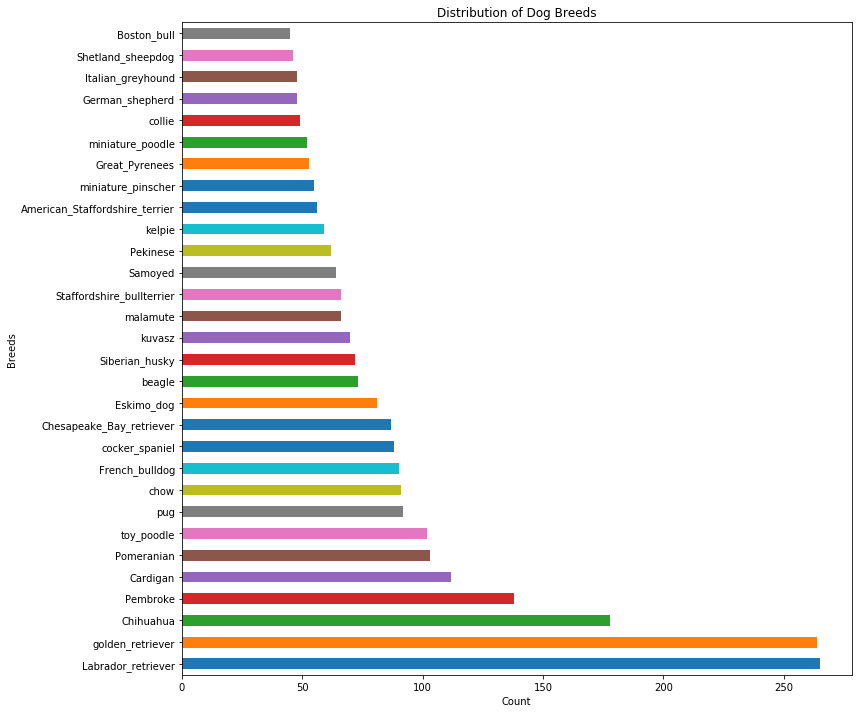

In [137]:
#frequency for dog breeds
plt.figure(figsize=(12,12));
breed_master_df.prediction.value_counts(ascending = False)[:30].plot(kind='barh')
plt.title('Distribution of Dog Breeds')
plt.xlabel('Count')
plt.ylabel('Breeds');

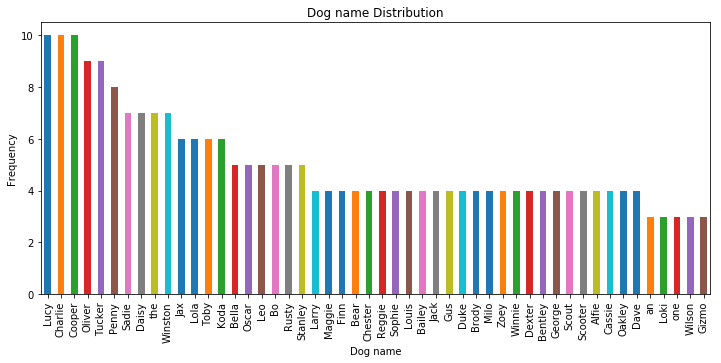

In [142]:
# dog_ stage frequencies
plt.figure(figsize=(12,5));
archive_df_2.name.value_counts().sort_values(ascending =False)[:50].plot(kind='bar')
plt.title("Dog name Distribution")
plt.xlabel('Dog name')
plt.ylabel('Frequency');

In [147]:
archive_df_2.rating_numerator.mean()

10.809331126389949

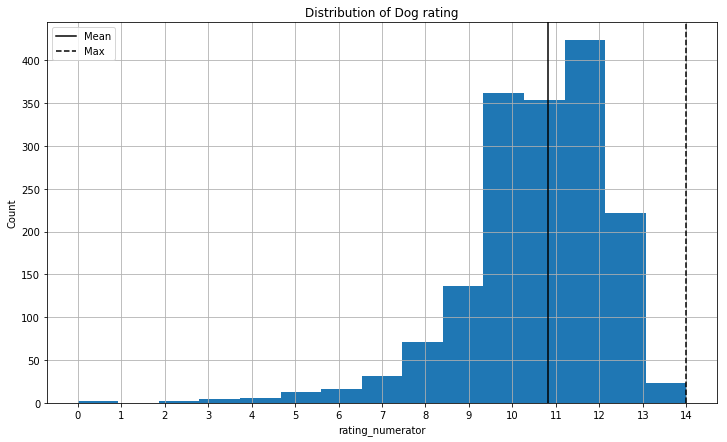

In [148]:
# histogram for the dog score
plt.figure(figsize=(12,7));
archive_df_2.rating_numerator.hist(bins=15)
plt.title('Distribution of Dog rating')
plt.xlabel('rating_numerator' )
plt.ylabel('Count')
plt.axvline(x= archive_df_2.rating_numerator.mean(),color='black', linestyle='-',label ='Mean')
plt.axvline(x= archive_df_2.rating_numerator.max(),color='black', linestyle='--',label ='Max')
plt.xticks(np.arange(15))
plt.legend(loc=0);

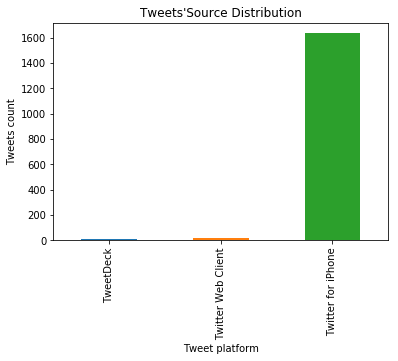

In [140]:
plt.title("Tweets'Source Distribution")
archive_df_2.source.value_counts().sort_values().plot(kind ='bar')
plt.xlabel('Tweet platform')
plt.ylabel('Tweets count');

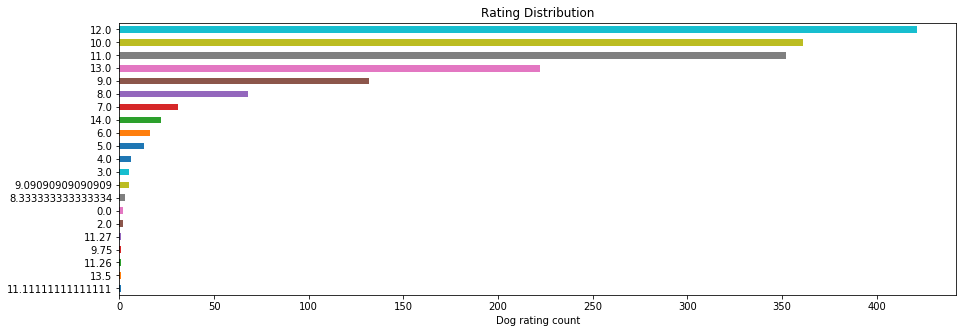

In [141]:
plt.figure(figsize=(15,5));
plt.title("Rating Distribution")
archive_df_2.rating_numerator.value_counts().sort_values().plot(kind ='barh')
plt.xlabel('Dog rating count');


##### End of visuale analysis